# Detección de anomalías LOF (Local Outlier Factor )

Importar dependencias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

Generación de datos sintéticos

In [2]:
np.random.seed(42)

# Datos normales (98 puntos)
X_inliers = np.random.normal(loc=0.0, scale=1.0, size=(98, 2))

# Datos outliers (2 puntos)
X_outliers = np.random.uniform(low=-6, high=6, size=(2, 2))

# Unión de datos
X = np.vstack((X_inliers, X_outliers))
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])

Análisis exploratorio de datos (EDA)

In [3]:
print("\nVisualización preliminar de los datos:")
df.head()


Visualización preliminar de los datos:


,feature_1,feature_2
0,0.496714,-0.138264
1,0.647689,1.523030
2,-0.234153,-0.234137
3,1.579213,0.767435
4,-0.469474,0.542560


In [4]:
print("\nDescripción de los datos:")
df.describe()


Descripción de los datos:


,feature_1,feature_2
count,100.000000,100.000000
mean,-0.085100,0.054382
std,0.870575,1.252120
min,-2.619745,-4.833882
25%,-0.685532,-0.662428
50%,-0.024104,0.141145
75%,0.389536,0.723484
max,1.886186,5.880646


In [5]:
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
feature_1    0
feature_2    0
dtype: int64



Gráfico de dispersión:


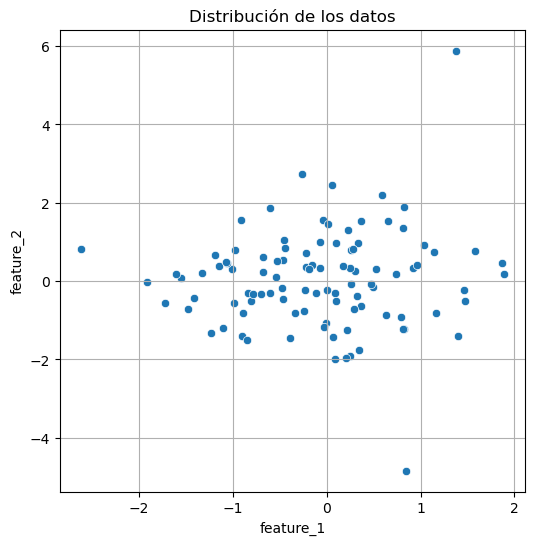

In [6]:
print("\nGráfico de dispersión:")
plt.figure(figsize=(6, 6))
sns.scatterplot(x='feature_1', y='feature_2', data=df)
plt.title('Distribución de los datos')
plt.grid(True)
plt.show()

Transformación de variables

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

Creación del modelo

In [9]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Suponemos 5% de outliers
y_pred = lof.fit_predict(X_scaled)


In [11]:
lof.negative_outlier_factor_

array([-1.00461388, -1.13817319, -0.95195305, -1.36427123, -0.97221423,
       -0.96632276, -1.21121421, -1.21702597, -1.02161578, -1.16580123,
       -1.23861056, -1.08834178, -0.97061709, -1.03356774, -0.97753181,
       -1.31342631, -1.06081513, -1.14721283, -1.22612172, -1.07220455,
       -1.02503971, -0.94627613, -1.14473223, -1.04423781, -1.16498947,
       -0.97801433, -0.99637235, -1.17990301, -0.98604926, -1.02721007,
       -0.95932224, -1.15990621, -1.12065176, -0.98888806, -0.99333948,
       -1.16963616, -1.17804588, -2.09345768, -0.95343748, -1.20597827,
       -0.95315343, -1.25682253, -1.02067184, -1.12023701, -0.97857562,
       -0.98692272, -0.97616451, -1.14128613, -0.96715793, -0.9606252 ,
       -1.08160692, -0.97751868, -0.94798994, -1.43836178, -0.96413433,
       -1.31382418, -1.41351493, -0.94758126, -1.08170684, -1.23458466,
       -1.11060141, -1.40816345, -1.31613959, -1.0567026 , -0.9754285 ,
       -1.12872105, -1.03069579, -1.24288988, -0.98092216, -1.14

Visualización de predicciones (-1 = outlier, 1 = inlier)

In [13]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1])

In [10]:
df['lof_score'] = lof.negative_outlier_factor_
df['outlier'] = y_pred

Visualización de resultados

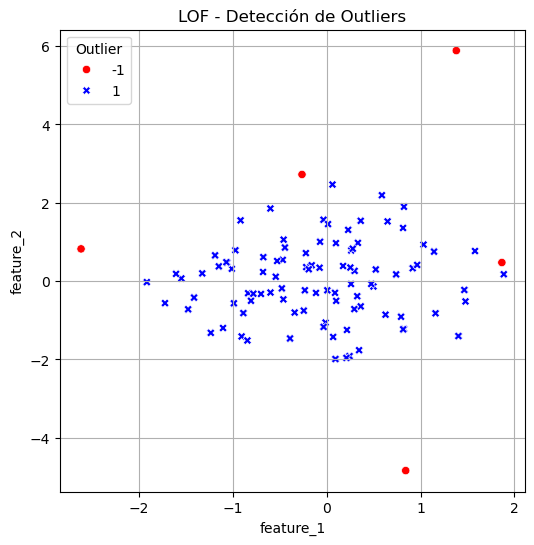

In [14]:
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x='feature_1', y='feature_2', data=df, hue='outlier',
    palette={1: 'blue', -1: 'red'}, style='outlier'
)
plt.title('LOF - Detección de Outliers')
plt.grid(True)
plt.legend(title='Outlier')
plt.show()

Outliers detectados

In [15]:
outliers_detected = df[df['outlier'] == -1]
print("Outliers detectados:")
display(outliers_detected)

Outliers detectados:


,feature_1,feature_2,lof_score,outlier
37,-2.619745,0.821903,-2.093458,-1
78,1.865775,0.473833,-1.456260,-1
89,-0.264657,2.720169,-1.571665,-1
98,0.840734,-4.833882,-3.115659,-1
99,1.380087,5.880646,-3.867293,-1
